<!---
Latex Macros
-->
$$
\newcommand{\bar}{\,|\,}
\newcommand{\Xs}{\mathcal{X}}
\newcommand{\Ys}{\mathcal{Y}}
\newcommand{\y}{\mathbf{y}}
\newcommand{\weights}{\mathbf{w}}
\newcommand{\balpha}{\boldsymbol{\alpha}}
\newcommand{\bbeta}{\boldsymbol{\beta}}
\newcommand{\aligns}{\mathbf{a}}
\newcommand{\align}{a}
\newcommand{\source}{\mathbf{s}}
\newcommand{\target}{\mathbf{t}}
\newcommand{\ssource}{s}
\newcommand{\starget}{t}
\newcommand{\repr}{\mathbf{f}}
\newcommand{\repry}{\mathbf{g}}
\newcommand{\x}{\mathbf{x}}
\newcommand{\prob}{p}
\newcommand{\vocab}{V}
\newcommand{\params}{\boldsymbol{\theta}}
\newcommand{\param}{\theta}
\DeclareMathOperator{\perplexity}{PP}
\DeclareMathOperator{\argmax}{argmax}
\DeclareMathOperator{\argmin}{argmin}
\newcommand{\train}{\mathcal{D}}
\newcommand{\counts}[2]{\#_{#1}(#2) }
\newcommand{\length}[1]{\text{length}(#1) }
\newcommand{\indi}{\mathbb{I}}
$$

# Assignment 2

## Introduction
In this assignment you will build the first stage of a biomedical event extractor. Biomedical events are state changes of biomolecules. For example, if you have a protein and you add a phosphate (PO4) group to it, this is referred to as a phosphorylation event. Many papers in the biomedical literature mention such events. The grand goal of biomedical event extraction is to teach machines how to read this literature and produce structured representations of biomedical events that biomedical researchers can query effectively. This task has received considerable attention in the NLP literature, and is the topic of a biennial [shared task](http://2011.bionlp-st.org/). We will use the data from this task as starting point for this assignment.   

To illustrate biomedical event extraction, let us consider an example. From the sentence 

> **phosphorylation** of TRAF2 **inhibits** **binding** to the CD40 domain

we could extract the structure 

> Negative_Regulation(Phosphorylation(TRAF2), Binding(TRAF2, CD40)

and store it in a database. Someone can then query this database, for example, to figure out all ways to prevent binding of TRAF2 to CD40.

The task is often divided into two steps. First you need to find **trigger** words in the sentence that correspond to biomedical events, and determine their event type *label*. For example, in the above sentence "phosphorylation" is a trigger word for an event of type "Phosphorylation", "inhibits" a trigger word for a "Negative Regulation" event, and "binding" a trigger for a "Binding" event. Notice that sometimes the type labels are obvious, but often they are not. Also note that the label of a word could be "None". For example, the word "of" in the above sentence has the label "None".  

The second step requires the extractor to produce **argument relations** between event triggers and protein mentions or other event triggers. For example, in the above case the argument of "phosphorylation" is "TRAF2", and one argument of "inhibits" is "phosphorylation of TRAF2" whereas the other is "binding to the CD40 domain". In this assignment you **do not have to do this**. We will focus on the event trigger detection problem exclusively. 

## Goal
Your goal is to develop an event trigger labeler. This extractor is given a sentence and a candidate token. Both constitute the input $\x$. One such input could be: 

> $\x$: phosphorylation of TRAF2 **inhibits** binding to the CD40 domain

The goal is to predict the label $y$ of the candidate event trigger. In the above case the label would be $y=\text{Negative_Regulation}$. 

Some candidates may not refer to event triggers at all. For example:

> $\x$: phosphorylation **of** TRAF2 inhibits binding to the CD40 domain

In such cases the label is $y=\text{None}$.

## Resources
To develop your model you have access to:

* The data in `data/bionlp/train`. This data can be split into training and dev set (as done below), or used for cross-validation.
* Helper code stored in the python module [bio.py](/edit/statnlpbook/bio.py).
* Libraries on the [docker image](https://github.com/uclmr/stat-nlp-book/blob/python/Dockerfile) which contains everything in [this image](https://github.com/jupyter/docker-stacks/tree/master/scipy-notebook), including scikit-learn and tensorflow. 

As we have to run the notebooks of all students, and because writing efficient code is important, **your notebook should run in 5 minutes at most**, on your machine. Further comments:

* We have tested a possible solution on the Azure VMs and it ran in about 30s, so it is possible to train a reasonable model on the data in reasonable time. If you find training times too long for your development cycle you can reduce the training set size. Once you have found a good solution you can increase the size again. Caveat: model parameters tuned on a smaller dataset may not be optimal for a larger training set.

* Try to run your parameter optimisation offline, such that in your answer notebook the best parameters are already set and don't need to be searched. Include your optimisation code in the notebook, but don't call it at each notebook run.

## Hint
While you do not need to predict the arguments of an event, it is important to understand how trigger labels relate to the syntactic and semantic arguments of the trigger word. Features that can capture this relation might help you in improving the result. Do inspect the data and try to get an understanding of it. That said, you don't have to be a biomedical expert to do well in this task. A few of the best results on the task were achieved by NLP researchers without any biomedical experience. They would, however, still inspect the data carefully.  

## Setup Instructions
It is important that this file is placed in the **correct directory**. It will not run otherwise. The correct directory is

    DIRECTORY_OF_YOUR_BOOK/assignments/2017/assignment2/problem/
    
where `DIRECTORY_OF_YOUR_BOOK` is a placeholder for the directory you downloaded the book to. After you placed it there, **rename the file** to your UCL ID (of the form `ucxxxxx`). 

## General Instructions
This notebook will be used by you to provide your solution, and by us to both assess your solution and enter your marks. It contains three types of sections:

1. **Setup** Sections: these sections set up code and resources for assessment. **Do not edit, move nor copy these cells**.
2. **Assessment** Sections: these sections are used for both evaluating the output of your code, and for markers to enter their marks. **Do not edit, move, nor copy these cells**.
3. **Task** Sections: these sections require your solutions. They may contain stub code, and you are expected to edit this code. For free text answers simply edit the markdown field.  

**If you edit, move or copy any of the setup, assessments and mark cells, you will be penalised with -10 points**.

Note that you are free to **create additional notebook cells** within a task section. 

Please **do not share** this assignment publicly, by uploading it online, emailing it to friends etc. 

## Submission Instructions

To submit your solution:

* Make sure that your solution is fully contained in this notebook. 
* Make sure that your solution runs linearly from start to end (no execution hops). We will run your notebook in that order.
* **If running your notebook produces a trivially fixable error that we spot, we will correct it and penalise you with -10 points. Otherwise you will get 0 points for that solution.**
* **Rename this notebook to your UCL ID** (of the form "ucxxxxx"), if you have not already done so. ** Failure to do so will result in -1 point.**
* Download the notebook in Jupyter via *File -> Download as -> Notebook (.ipynb)*.
* Upload the notebook to the Moodle submission site.

## <font color='green'>Setup 1</font>: Load Libraries
This cell loads libraries important for evaluation and assessment of your model. **Do not change, move or copy it.**

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib inline
#! SETUP 1 - DO NOT CHANGE, MOVE NOR COPY
import sys, os
_snlp_book_dir = "../../../../"
sys.path.append(_snlp_book_dir) 
import math
from collections import defaultdict
import statnlpbook.bio as bio

## <font color='green'>Setup 2</font>: Load Training Data

This cell loads the training data. **Do not edit this setup section, nor copy it**. Instead refer to the variables in your own code, and slice and dice them as you see fit (but do not change their values). For example, no one will stop you from introducing, in the corresponding task section, `my_event_train` and `my_event_dev` variables that split the data into different folds.   

Notice that the data is loaded from `json` files like [this one](/edit/data/bionlp/train/PMC-1310901-00-TIAB.json). Generally, you do not need to understand this format, as we provide loading functions that produce more convenient data structures shown below. But do feel free to investigate. 

In [2]:
#! SETUP 2 - DO NOT CHANGE, MOVE NOR COPY
train_path = _snlp_book_dir + "data/bionlp/train"
event_corpus = bio.load_assignment2_training_data(train_path)
event_train = event_corpus[:len(event_corpus)//4 * 3]
event_dev = event_corpus[len(event_corpus)//4 * 3:]
assert(len(event_train)==53988)

## Data Structures
The data comes in the form of pairs consisting of `EventCandidate` objects and their trigger labels. The `EventCandidate` class can be found in [bio.py](/edit/statnlpbook/bio.py).

In [3]:
event_candidate, label = event_corpus[0]
(event_candidate.sent, label)

(<statnlpbook.bio.Sentence at 0x7f50f5804320>, 'Negative_regulation')

Event candidate objects specify the classification problem. They consist of a sentence `sent` and the position `trigger_index` of the trigger candidate word. 

In [4]:
event_candidate.sent

In [5]:
event_candidate.trigger_index

0

Event candidates also have a set of candidate arguments. These point to token spans (index of first token, inclusive, index of last token, exclusive) in the sentence that may or may not be *arguments* of the event. In the full event extraction task one needs to predict which of these candidates are true arguments of the events. However, here we will ignore this task, and give you only the information what candidates exist, not what their labels are. Note that this information can still be **very important** to understand what type of event the candidate corresponds to, if any. 

In [6]:
event_candidate.argument_candidate_spans[1]

(23, 24)

You can compactly visualise the complete candidate using `bio.render_event`, as shown below. Here the green span corresponds to the token at the trigger index. The spans in red brackets correspond to the argument candidates. The blue spans are protein mentions. 

In [7]:
event_candidate, label = event_corpus[0]
(event_candidate.sent, label)

(<statnlpbook.bio.Sentence at 0x7f50f5804320>, 'Negative_regulation')

In [8]:
event_candidate.sent.children[1]

[]

In [9]:
bio.render_event(event_candidate)

### Sentences
The sentence object of an event candidate provides additional information about the sentence, such as what spans are proteins, what Part-of-Speech labels the tokens have, and a dependency parse of the sentence. First, the `tokens` field of a sentence provides useful features of tokens: 

In [10]:
event_candidate.sent.tokens[1]

{'begin': 16, 'end': 18, 'index': 1, 'pos': 'IN', 'stem': 'of', 'word': 'of'}

The `dependencies` field stores lexical dependencies between words:

In [11]:
event_candidate.sent.dependencies[1]

{'head': 4, 'label': 'nn', 'mod': 2}

You can render the dependency graph of a sentence like so:

In [12]:
bio.render_dependencies(event_candidate.sent)

You can learn about the dependency labels in the [Stanford typed dependencies manual](http://nlp.stanford.edu/software/dependencies_manual.pdf). We also provide [lecture notes on dependency parsing](/notebooks/chapters/Transition-based%20dependency%20parsing.ipynb), including various pointers to more information. 

The `mentions` stores which spans correspond to proteins.

In [13]:
event_candidate.sent.mentions

[{'begin': 2, 'end': 6, 'label': 'Protein'},
 {'begin': 23, 'end': 24, 'label': 'Protein'},
 {'begin': 24, 'end': 25, 'label': 'Protein'},
 {'begin': 59, 'end': 63, 'label': 'Protein'},
 {'begin': 64, 'end': 65, 'label': 'Protein'}]

There are some convenience functions for the sentence to check all the syntactic parents or children of a token, or whether a specific token is within a protein mention. These can be useful when designing features:

In [14]:
event_candidate.sent.parents[0], event_candidate.sent.children[0] 

([(44, 'nsubj')], [(7, 'prep_of'), (20, 'prep_in')])

### Labels
It is useful to know the complete set of event labels:

In [15]:
{y for _,y in event_corpus}

{'Binding',
 'Gene_expression',
 'Localization',
 'Negative_regulation',
 'None',
 'Phosphorylation',
 'Positive_regulation',
 'Protein_catabolism',
 'Regulation',
 'Transcription'}

## <font color='blue'>Task 1</font>: Create a Feature Function

In this task you will extract a specific feature representation $\repr(\x)$ for an event candidate $\x$. In particular, we want to add as features the syntactic children (modifiers) of the trigger token, together with their syntactic dependency label. A modifier of a token $h$ is a token $m$ that modifies $h$'s meaning. For example, in the noun phrase "green light" the adjective "green" modifies the noun "light". We will refer to the modifier token as the "child", and the modified token as "parent". Correspondingly, in the dependency graph modifiers are the child nodes of the modified tokens.  

The feature function will have to be implemented as a python function that populates a python dictionary with key-value pairs where the key indicates both the word and syntactic label of the child. 

For example, consider the following event and dependency parse:

In [16]:
example = event_corpus[398][0]
bio.render_dependencies(example.sent)
example

In [17]:
example.sent.dependencies

[{'head': 2, 'label': 'det', 'mod': 0},
 {'head': 2, 'label': 'nn', 'mod': 1},
 {'head': 4, 'label': 'nsubjpass', 'mod': 2},
 {'head': 4, 'label': 'auxpass', 'mod': 3},
 {'head': 10, 'label': 'det', 'mod': 6},
 {'head': 8, 'label': 'number', 'mod': 7},
 {'head': 10, 'label': 'amod', 'mod': 8},
 {'head': 10, 'label': 'nn', 'mod': 9},
 {'head': 4, 'label': 'prep_on', 'mod': 10},
 {'head': 13, 'label': 'auxpass', 'mod': 12},
 {'head': 4, 'label': 'dep', 'mod': 13},
 {'head': 16, 'label': 'nn', 'mod': 15},
 {'head': 13, 'label': 'prep_with', 'mod': 16},
 {'head': 4, 'label': 'dep', 'mod': 18},
 {'head': 13, 'label': 'conj_and', 'mod': 18}]

Here the goal is to produce a dictionary that maps the strings "Child: det->The" and "Child: nn->PCR" to 1.0. 

To solve this task, implement the feature function below. The passed in `result` is a dictionary you need to populate with more entries, and the `event` argument indicates for which event you need to extract the features. We have already populated the function with some initial code that should get you started.  

In [18]:
def add_dependency_child_feats(result, event):
    """
    Append to the `result` dictionary features based on the syntactic dependencies of the event trigger word of
    `event`. The feature keys should have the form "Child: [label]->[word]" where "[label]" is the syntactic label
    of the syntatic child (e.g. "det" in the case above), and "[word]" is the word of the syntactic child (e.g. "The" 
    in the case above).
    Args:
        result: a defaultdict that returns `0.0` by default. 
        event: the event for which we want to populate the `result` dictionary with dependency features.
    Returns:
        Nothing, but populates the `result` dictionary. 
    """
    index = event.trigger_index # You will need to change this 
    for child,label in event.sent.children[index]:
        result["Child: " + str(label) + "->" + str(event.sent.tokens[child]['word'])] += 1.0 

## <font color='red'>Assessment 1</font>: Test Feature Function (20 pts)
Here we test whether your feature function populates the given dictionary correctly. If the result passes all three tests you get 10 pts. Of course, solutions that just manually populate the result with the specific key value pairs tested below will receive 0 pts as well.

In [19]:
#! ASSESSMENT 1 - DO NOT CHANGE, MOVE NOR COPY
result = defaultdict(float)
add_dependency_child_feats(result, example)

check_1 = len(result) == 2
check_2 = result['Child: det->The'] == 1.0
check_3 = result['Child: nn->PCR'] == 1.0
(check_1, check_2, check_3)

(True, True, True)

## <font color='orange'>Mark</font>:  Your solution to Task 1 is marked with ** __ points**. 
---

## <font color='blue'>Task 2</font>: Implement Model

You are to implement the `predict_event_labels` function below. This function gets as input a list of event candidate objects, and then returns a sequence of corresponding labels. You can implement this function in any way you like, again utilising any library on the docker image. We have populated the cell and function with a simple implementation that uses the scikit-learn logistic regression model. You can use this as a starting point and focus on implementing better feature functions. You can also start from scratch if you like. 


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
from collections import defaultdict

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

# converts labels into integers, and vice versa, needed by scikit-learn.
label_encoder = LabelEncoder()

# encodes feature dictionaries as numpy vectors, needed by scikit-learn.
vectorizer = DictVectorizer()              

def event_feat(event):
    """
    This feature function returns a dictionary representation of the event candidate. You can improve the model 
    by improving this feature function.
    Args:
        event: the `EventCandidate` object to produce a feature dictionary for.
    Returns:
        a dictionary with feature keys/indices mapped to feature counts.
    """
    result = defaultdict(float)
    index = event.trigger_index
    token = event.sent.tokens
    
    #basic feature of a trigger
    result['trigger_word: ' + token[index]['word']] = 1.0
    result['trigger_stem: ' + token[index]['stem']] = 1.0
    
    #dependencies feature of a trigger
    for child,label in event.sent.children[index]:
        result["Child label->word: " + str(label) + "->" + token[child]['word']] = 1.0
        result["Child pos: " + token[child]['pos']] = 1.0
        if event.sent.is_protein[child] == 1:
            result["Child is protein: "] = 1.0
        for child, label in event.sent.children[child]:
            result["Grandchild label->word: " + str(label) + "->" + token[child]['word']] = 1.0
            result["Grandchild pos: " + token[child]['pos']] = 1.0
            if event.sent.is_protein[child] == 1:
                result["GrandChildisprotein: "] = 1.0
 
    for parents,label in event.sent.parents[index]:
        result["Parent label->word: " + str(label) + "->" + token[parents]['word']] += 1.0
        result["Parent pos: " + token[parents]['pos']] = 1.0
        if event.sent.is_protein[parents] == 1:
            result["Parent is protein: "] = 1.0
        for parents,label in event.sent.parents[parents]:
            result["Grandparent label->word: " + str(label) + "->" + token[parents]['word']] = 1.0
            result["Grandparent pos: " + token[parents]['pos']] = 1.0
            if event.sent.is_protein[parents] == 1:
                result["Grandparent is protein: "] = 1.0
                        
    #bigram feature of a trigger
    if index>0 and index<len(event.sent.tokens):
        result['right biagram: '+ token[index]['word'] + ',' + token[index+1]['word']] = 1.0
        result['left biagram: '+ token[index-1]['word'] + ',' + token[index]['word']] = 1.0
    
    #distance to leftmost and rightmost protein
    index_leftmost_protein = 0;
    index_rightmost_protein = 0
    for i in range(index,0,-1):
        if event.sent.is_protein[i]:
            index_leftmost_protein = i
            result['distance to leftmost protein: ' + str(index - index_leftmost_protein)] = 1.0
            break
                
    for i in range(index,len(token)-1,1):
        if event.sent.is_protein[i]:
            index_rightmost_protein = i
            result['distance to rightmost protein: ' + str(index_rightmost_protein - index)] = 1.0
            break

    #mentions feature
    for i in range(len(event.sent.mentions)):
        mention = event.sent.mentions[i]
        for j in range(mention['begin'],mention['end']):
            for parents ,label in event.sent.parents[j]:
                result["parent protein label->word: "+ str(label) + "->" + token[parents]['word']] = 1.0
                result["parent protein pos: " + token[parents]['pos']] = 1.0
                
            for child, label in event.sent.children[j]:
                result["Child protein label->word: " + str(label) + "->" + token[child]['word']] = 1.0
                result["Child protein pos: " + token[child]['pos']] = 1.0
               
    return result
    
# We convert the event candidates and their labels into vectors and integers, respectively.
train_event_x = vectorizer.fit_transform([event_feat(x) for x,_ in event_train])
train_event_y = label_encoder.fit_transform([y for _,y in event_train])

# Create and train the model. Feel free to experiment with other parameters and learners.
#lr = LogisticRegression(C=5,class_weight='balanced')
#lr.fit(train_event_x, train_event_y)

model = LogisticRegression(C=2,class_weight='balanced')
model.fit(train_event_x,train_event_y)



def predict_event_labels(event_candidates):
    """
    This function receives a list of `bio.EventCandidate` objects and predicts their labels. 
    It is currently implemented using scikit-learn, but you are free to replace it with any other
    implementation as long as you fulfil its contract.
    Args:
        event_candidates: A list of `EventCandidate` objects to label.
    Returns:
        a list of event labels, where the i-th label belongs to the i-th event candidate in the input.
    """
    event_x = vectorizer.transform([event_feat(e) for e in event_candidates])
    event_y = label_encoder.inverse_transform(model.predict(event_x))
    return event_y

It is useful to inspect the performance of your model, and see where it makes errors, both on the training set (to check for underfitting) and the development set. We have provided you with utility functions to help with this inspection. Note that you don't have to use these utilities, or the cells below, but it can help you to improve your model, and also with the error analysis and description of the approach in Task 3. 

First, we give you a breakdown of precision, recall and F1 on different event types:

In [21]:
# This line calls your function to produce labels for the test set
event_dev_guess = predict_event_labels([x for x,_ in event_dev[:]])
# This line produces a confusion matrix
cm_dev = bio.create_confusion_matrix(event_dev,event_dev_guess)  
# This line turns the confusion matrix into a evaluation table with Precision, Recall and F1 for all labels.
bio.full_evaluation_table(cm_dev)

,Label,Gold,Guess,Precision,Recall,F1
0,Binding,180,172,0.651163,0.622222,0.636364
1,Gene_expression,377,384,0.794271,0.809019,0.801577
2,Localization,71,55,0.818182,0.633803,0.714286
3,Negative_regulation,210,201,0.626866,0.600000,0.613139
4,Phosphorylation,32,31,0.935484,0.906250,0.920635
5,Positive_regulation,570,593,0.630691,0.656140,0.643164
6,Protein_catabolism,21,22,0.681818,0.714286,0.697674
7,Regulation,188,159,0.654088,0.553191,0.599424
8,Transcription,112,98,0.673469,0.589286,0.628571
9,[All],1761,1715,0.685714,0.667802,0.676640


It is useful to inspect [bio.py](/edit/statnlpbook/bio.py) to see how we define precision, recall and F1 score in this context.

You can also display a confusion matrix to identify what types of errors you are currently making. Notice that the matrix ignores the "None"-"None" cell as its counts would overpower all other counts (try removing the `outside_label` argument). 

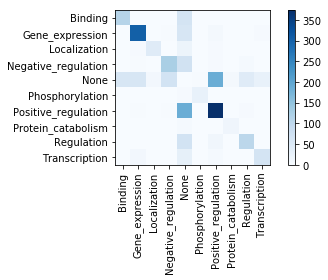

In [22]:
import statnlpbook.util as util
util.plot_confusion_matrix_dict(cm_dev,90, outside_label="None")

The confusion matrix can give you hints on what type of errors you should look for and improve upon. This macro view on your model's performance is often more powerful when combined with a micro view on the instances that produce these errors. You can find errors of a specific type using `bio.find_errors` as shown below:

In [23]:
errors = bio.find_errors("Positive_regulation","None", event_dev, event_dev_guess)[:3]
errors

[(<statnlpbook.bio.EventCandidate at 0x7f50e32c3f60>,
  'Positive_regulation',
  'None'),
 (<statnlpbook.bio.EventCandidate at 0x7f50e32d8c88>,
  'Positive_regulation',
  'None'),
 (<statnlpbook.bio.EventCandidate at 0x7f50e31fd240>,
  'Positive_regulation',
  'None')]

These errors you can then inspect in detail via `show_event_error`:

In [24]:
bio.show_event_error(*errors[0])

Gold,Guess
Positive_regulation,None


It can also be very useful to inspect your feature map for the given instance. Sometimes this leads you to find out that you have a bug in your feature calculation, or that the feature representation is still insufficient for other reasons.

In [25]:
event_feat(errors[0][0])

defaultdict(float,
            {'Child protein label->word: amod->identified': 1.0,
             'Child protein label->word: conj_and->epsilon': 1.0,
             'Child protein label->word: det->the': 1.0,
             'Child protein label->word: nn->I': 1.0,
             'Child protein label->word: nn->kappaB': 1.0,
             'Child protein pos: DT': 1.0,
             'Child protein pos: NN': 1.0,
             'Child protein pos: VBN': 1.0,
             'distance to leftmost protein: 11': 1.0,
             'left biagram: line,following': 1.0,
             'parent protein label->word: appos->molecules': 1.0,
             'parent protein label->word: conj_and->beta': 1.0,
             'parent protein label->word: nn->beta': 1.0,
             'parent protein label->word: nn->epsilon': 1.0,
             'parent protein label->word: nn->kappaB': 1.0,
             'parent protein pos: NN': 1.0,
             'parent protein pos: NNS': 1.0,
             'right biagram: following,stimulati

## <font color='red'>Assessment 2</font>: Assess Accuracy (50+10 pts) 

We assess how well your model performs on some unseen test set. We will look at the F1 across all event types, and will score them as follows:

* 0-40pts: 17% <= F1 < 60%, linear
* 40-50pts: 60% <= F1 < 70%, linear
* 50-60pts: 70% <= F1 < 80%, linear

The **linear** mapping maps any F1 value between the lower and upper bound linearly to a score. For example, if your model's F1 score is $F=55$, then your score is $40\frac{F-17}{60-17}$. 

In [26]:
#! ASSESSMENT 2 - DO NOT CHANGE, MOVE NOR COPY
_snlp_event_test = event_dev # This line will be changed by us after submission to point to a test set.
_snlp_event_test_guess = predict_event_labels([x for x,_ in _snlp_event_test[:]])
_snlp_cm_test = bio.create_confusion_matrix(_snlp_event_test,_snlp_event_test_guess)  
bio.evaluate(_snlp_cm_test)[2] # This is the F1 score

0.6766398158803222

## <font color='orange'>Mark</font>:  Your solution to Task 2 is marked with ** __ points**. 
---

## <font color='blue'>Task 3</font>: Describe your Approach

Enter a 500 words max description of your approach **in this cell**. Also provide an **error analysis** of the types of errors your system still makes, with suggestions on how to improve it further. Should you need to include figures in your report, make sure they are Python-generated. For that, feel free to create new cells after this cell (before Assessment 3 cell). Link online images at your risk.

  In this assignment, to predict the biomedical label of the selected trigger word, one important thing to do is to find out the relationship between triggers and the proteins. Other arguments whose labels are not protein are also important because although we do not know they label, these word can play a very important part in a sentence. Then the most useful features would be its basic feature(word,stem) and lexical dependencies between triggers and its chidren and parent.
  
  Here are the features of my model to predict a trigger's label:
    1. baisic feature
       In this part the model select the word and the stem form as features to the model. Because same word with 
       different label are also possible to have the same 'pos'. Therefore the pos of the trigger is not used as a
       feature.
       
    2. dependencies features
        The model focus on the label, word, pos features of the trigger's children, grandchildren, parents and 
        grandparents. Besides, the model also checks weather the trigger's children, grandchildren, parents or
        grandparent are proteins.
        
    3. bigram features
       The model will use the left bigram words and right bigram words of the trigger as feature. 
       
    4. distance feature
       The distance between trigger and its leftmost protein and the distance between trigger and its rightmost
       protein are used as features.
       
    5. mentions features
       In this part, the model check all the mentions(protein words) in the sentence and then select the word,label
       and pos features of mentions' children and parents.
        
Other features I tired but do not improve the performance:
    1. path denpendency:
       Use the recursion to find the child of the trigger until the child is a protein and then use the label
       sequence as a feature. I think this is a useful feature, but there may be some noisy labels such as 'det' and
       'prep_of' which can affect the model. Another problem is that the path dependency can be very long and 
       therefore fails to be a efficient feature.
              
    2. for trigger without dependencies feature
       Choose the pos feature of its left word and right word as features.
       
       
       

In [27]:
# This line calls your function to produce labels for the test set
event_dev_guess = predict_event_labels([x for x,_ in event_dev[:]])
# This line produces a confusion matrix
cm_dev = bio.create_confusion_matrix(event_dev,event_dev_guess)  
# This line turns the confusion matrix into a evaluation table with Precision, Recall and F1 for all labels.
bio.full_evaluation_table(cm_dev)

,Label,Gold,Guess,Precision,Recall,F1
0,Binding,180,172,0.651163,0.622222,0.636364
1,Gene_expression,377,384,0.794271,0.809019,0.801577
2,Localization,71,55,0.818182,0.633803,0.714286
3,Negative_regulation,210,201,0.626866,0.600000,0.613139
4,Phosphorylation,32,31,0.935484,0.906250,0.920635
5,Positive_regulation,570,593,0.630691,0.656140,0.643164
6,Protein_catabolism,21,22,0.681818,0.714286,0.697674
7,Regulation,188,159,0.654088,0.553191,0.599424
8,Transcription,112,98,0.673469,0.589286,0.628571
9,[All],1761,1715,0.685714,0.667802,0.676640


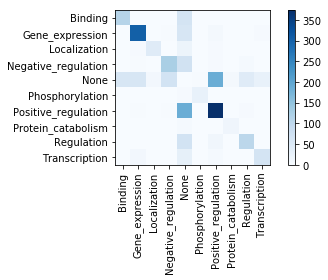

In [28]:
import statnlpbook.util as util
util.plot_confusion_matrix_dict(cm_dev,90, outside_label="None")

Error analysis:

  My model gets about 67.6% accuray on the dev set. It turns oout that the main problem of the model is that it fail to predict the Negative_regulation, Postive_regulation and regulation in high accuracy and mispredicts these triggers to be None. One solution is to use the Markov Model to predict the trigger label using the previous label or next label. Another problem is that the model also fails to predict the word without dependencies features. For these words, we can first check weather they belong to a phrase. If the answer is yes, than we can assume that the phrase has the same label.
    



## <font color='red'>Assessment 3</font>: Assess Description (30 pts) 

We will mark the description along the following dimensions: 

* Clarity (10pts: very clear, 0pts: we can't figure out what you did)
* Creativity (10pts: we could not have come up with this, 0pts: Use only word based features of the trigger word)
* Substance (10pts: implemented complex state-of-the-art classifier, 0pts: Only use what is already there)

## <font color='orange'>Mark</font>:  Your solution to Task 3 is marked with ** __ points**.
---

## <font color='orange'>Final mark</font>: Your solution to Assignment 2 is marked with ** __points**. 